In [1]:
pip install "numpy<2" --upgrade


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install "tensorflow<2.16"


Note: you may need to restart the kernel to use updated packages.


In [3]:
# general functions
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import OrderedDict
# visualization
from PIL import Image
# identifying faces
%pip install mtcnn
from mtcnn.mtcnn import MTCNN
# visualizing bounding boxes
import matplotlib.patches as patches
# CNN
import keras
from sklearn.model_selection import train_test_split
# Moving files between directories
import shutil
from shutil import unpack_archive
from subprocess import check_output

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Note: you may need to restart the kernel to use updated packages.



In [4]:
dataset_path = "C:/Users/HP/Downloads/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/"
print(dataset_path)

C:/Users/HP/Downloads/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/


In [5]:
# Data read-in and cleaning
lfw_allnames = pd.read_csv(r"C:/Users/HP/Downloads/lfw-dataset/lfw_allnames.csv")
#lfw_allnames = pd.read_csv("r/C:/Users/HP/Downloads/lfw-dataset/lfw_allnames.csv")
matchpairsDevTest = pd.read_csv(r"C:/Users/HP/Downloads/lfw-dataset/matchpairsDevTest.csv")
matchpairsDevTrain = pd.read_csv(r"C:/Users/HP/Downloads/lfw-dataset/matchpairsDevTrain.csv")
mismatchpairsDevTest = pd.read_csv(r"C:/Users/HP/Downloads/lfw-dataset/mismatchpairsDevTest.csv")
mismatchpairsDevTrain = pd.read_csv(r"C:/Users/HP/Downloads/lfw-dataset/mismatchpairsDevTrain.csv")
pairs = pd.read_csv(r"C:/Users/HP/Downloads/lfw-dataset/pairs.csv")
# tidy pairs data: 
pairs = pairs.rename(columns ={'name': 'name1', 'Unnamed: 3': 'name2'})
matched_pairs = pairs[pairs["name2"].isnull()].drop("name2",axis=1)
mismatched_pairs = pairs[pairs["name2"].notnull()]
people = pd.read_csv(r"C:/Users/HP/Downloads/lfw-dataset/people.csv")
# remove null values
people = people[people.name.notnull()]
peopleDevTest = pd.read_csv(r"C:/Users/HP/Downloads/lfw-dataset/peopleDevTest.csv")
peopleDevTrain = pd.read_csv(r"C:/Users/HP/Downloads/lfw-dataset/peopleDevTrain.csv")


In [6]:
print(lfw_allnames)

                    name  images
0                AJ_Cook       1
1               AJ_Lamas       1
2          Aaron_Eckhart       1
3            Aaron_Guiel       1
4        Aaron_Patterson       1
...                  ...     ...
5744      Zorica_Radovic       1
5745      Zulfiqar_Ahmed       1
5746        Zumrati_Juma       1
5747     Zurab_Tsereteli       1
5748  Zydrunas_Ilgauskas       1

[5749 rows x 2 columns]


In [7]:
print(lfw_allnames['images'])

0       1
1       1
2       1
3       1
4       1
       ..
5744    1
5745    1
5746    1
5747    1
5748    1
Name: images, Length: 5749, dtype: int64


In [8]:
print(matchpairsDevTest)

                   name  imagenum1  imagenum2
0          Abdullah_Gul         13         14
1          Abdullah_Gul         13         16
2      Abdullatif_Sener          1          2
3        Adel_Al-Jubeir          1          3
4             Al_Pacino          1          2
..                  ...        ...        ...
495        Winona_Ryder          6         15
496        Winona_Ryder         19         21
497  Yevgeny_Kafelnikov          3          4
498    Yoriko_Kawaguchi          3         10
499      Zoran_Djindjic          3          4

[500 rows x 3 columns]


In [9]:
print(matchpairsDevTrain)

                     name  imagenum1  imagenum2
0           Aaron_Peirsol          1          2
1           Aaron_Peirsol          3          4
2            Aaron_Sorkin          1          2
3     Abdel_Nasser_Assidi          1          2
4                Abdullah          1          3
...                   ...        ...        ...
1095           Zhu_Rongji          1          9
1096           Zhu_Rongji          4          7
1097           Zhu_Rongji          4          8
1098           Zhu_Rongji          5          6
1099      Zinedine_Zidane          2          4

[1100 rows x 3 columns]


In [10]:
print(mismatchpairsDevTest)

                            name  imagenum1                        name.1  \
0                       AJ_Lamas          1                   Zach_Safrin   
1                    Aaron_Guiel          1             Reese_Witherspoon   
2                   Aaron_Tippin          1  Jose_Luis_Rodriguez_Zapatero   
3         Abdul_Majeed_Shobokshi          1                  Charles_Cope   
4                   Abdullah_Gul         16                     Steve_Cox   
..                           ...        ...                           ...   
495                 Susan_Whelan          1         Wolfgang_Schneiderhan   
496                  Takeo_Fukui          1               Will_Ofenheusle   
497                 Tamara_Mowry          1                   Zach_Parise   
498  Tatiana_Kennedy_Schlossberg          1                 Thomas_Watjen   
499                   Todd_Petit          1             Vicente_Fernandez   

     imagenum2  
0            1  
1            3  
2            1  
3      

In [11]:
print(mismatchpairsDevTrain)

                     name  imagenum1                name.1  imagenum2
0                 AJ_Cook          1       Marsha_Thomason          1
1            Aaron_Sorkin          2          Frank_Solich          5
2     Abdel_Nasser_Assidi          2          Hilary_McKay          1
3          Abdoulaye_Wade          4            Linda_Dano          1
4            Abdul_Rahman          1           Magui_Serna          1
...                   ...        ...                   ...        ...
1095          Tom_Vilsack          1        Wayne_Ferreira          5
1096         Trisha_Meili          1  Vladimiro_Montesinos          3
1097             Ty_Votaw          1          Wayne_Allard          1
1098       Vytas_Danelius          1        Zaini_Abdullah          1
1099        Wendy_Kennedy          1        Zara_Akhmadova          1

[1100 rows x 4 columns]


In [12]:
print(pairs)

                                    name1  imagenum1      imagenum2  name2
0                            Abel_Pacheco          1              4    NaN
1                          Akhmed_Zakayev          1              3    NaN
2                          Akhmed_Zakayev          2              3    NaN
3                           Amber_Tamblyn          1              2    NaN
4                   Anders_Fogh_Rasmussen          1              3    NaN
...                                   ...        ...            ...    ...
5995                           Scott_Wolf          2  Troy_Polamalu    1.0
5996  Sergei_Alexandrovitch_Ordzhonikidze          1   Yolanda_King    1.0
5997                           Shane_Loux          1   Val_Ackerman    1.0
5998                         Shawn_Marion          1  Shirley_Jones    1.0
5999                   Slobodan_Milosevic          2         Sok_An    1.0

[6000 rows x 4 columns]


In [13]:
#2. Exploratory Data Analysis (EDA)
print("Summary:")

print("There are " + 
      str(lfw_allnames.shape[0]) + 
      " unique celebrities in the entire dataset, of whom " + 
      str(sum(lfw_allnames.images > 1)) + 
      " are represented by multiple images. The entire number of images available is " + 
      str(sum(lfw_allnames.images)) + 
      ". The most represented celebrity is " + 
      str(lfw_allnames.iloc[lfw_allnames['images'].idxmax()][0]) + 
      ", with " + 
      str(max(lfw_allnames.images)) + 
      " unique images in the dataset.")

Summary:
There are 5749 unique celebrities in the entire dataset, of whom 1680 are represented by multiple images. The entire number of images available is 13233. The most represented celebrity is George_W_Bush, with 530 unique images in the dataset.


C:\Users\HP\AppData\Local\Temp\ipykernel_24756\4150501495.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(lfw_allnames.iloc[lfw_allnames['images'].idxmax()][0]) +


In [14]:
'''It is useful to gain an understanding of how the data is structured before we begin building the model. Using (omitted) exploratory code and information provided in the LDW dataset, a summary of the available files follows below:

lfw_allnames.csv: a CSV containing two columns; name (a list of all names in the entire dataset) and images (the number of images available for the each name)
matchpairsDevTest: a random sample of 500 image pairs featuring the same individual, with columns for the name and the two image labels
matchpairsDevTrain: a random sample of 1100 image pairs featuring the same individual, with columns for the name and the image labels
mismatchpairsDevTest: a random sample of 500 image pairs featuring different individuals, with columns for both names and the two image labels
mismatchpairsDevTrain: a random sample of 1100 image pairs featuring different individuals, with columns for both names and the two image labels
pairs.csv: 6000 pairs of images, both matched and mismatched. Matched pair rows contain a name and two image files, while unmatched pair rows contain a name for each of the images. 
For further formating, these two sets of rows will be split into matched_pairs and unmatched_pairs data frames
people.csv: list of names and image counts, identical to lfw_allnames.csv once null values have been removed. Omit from further analysis
peopleDevTest.csv: 1711 individuals in the dataset designed for testing: columns for celebrity name and image count (zero overlap with peopleDevTrain.csv)
peopleDevTrain.csv: 4038 individuals in the dataset designed for training: columns for celebrity name and image count (zero overlap with peopleDevTest.csv)

In addition, we have a catalogue of deepfunneled LFW images, created by Gary B. Huang, Marwan Mattar, Honglak Lee, and Erik Learned-Miller (details here). 
This is the most useful dataset created by the LFW team, as the images have been rotated and sized to ensure consistent alignment prior to analysis, leading to stronger results when image recognition algorithms are applied to the dataset.

Data reshaping and train/test split
We need to define the objective more clearly before we create the train/test split. What are we trying to achieve with this project?

The flow of the project should be as follows:

Build a model on the training data that can predict the names associated with images
The training set should incorporate multiple images of some individuals, to equip the model with knowledge of how to deal with the same face in different situations
Test the model on new images and predict the identity
The test set needs to incorporate some individuals that we have seen in the training set (although not the same images) and some individuals that we haven't, to test the algorithm's accuracy
Therefore, we need to split the data into training and test data.'''

"It is useful to gain an understanding of how the data is structured before we begin building the model. Using (omitted) exploratory code and information provided in the LDW dataset, a summary of the available files follows below:\n\nlfw_allnames.csv: a CSV containing two columns; name (a list of all names in the entire dataset) and images (the number of images available for the each name)\nmatchpairsDevTest: a random sample of 500 image pairs featuring the same individual, with columns for the name and the two image labels\nmatchpairsDevTrain: a random sample of 1100 image pairs featuring the same individual, with columns for the name and the image labels\nmismatchpairsDevTest: a random sample of 500 image pairs featuring different individuals, with columns for both names and the two image labels\nmismatchpairsDevTrain: a random sample of 1100 image pairs featuring different individuals, with columns for both names and the two image labels\npairs.csv: 6000 pairs of images, both matche

In [15]:
print(lfw_allnames['images'])
image_paths = lfw_allnames.loc[lfw_allnames.index.repeat(lfw_allnames['images'])]

0       1
1       1
2       1
3       1
4       1
       ..
5744    1
5745    1
5746    1
5747    1
5748    1
Name: images, Length: 5749, dtype: int64


In [16]:
# shape data frame so there is a row per image, matched to relevant jpg file
image_paths = lfw_allnames.loc[lfw_allnames.index.repeat(lfw_allnames['images'])]
image_paths['image_path'] = 1 + image_paths.groupby('name').cumcount()
image_paths['image_path'] = image_paths.image_path.apply(lambda x: '{0:0>4}'.format(x))
image_paths['image_path'] = image_paths.name + "/" + image_paths.name + "_" + image_paths.image_path + ".jpg"
image_paths = image_paths.drop("images",axis=1)

from sklearn.model_selection import train_test_split

# take a random sample: 80% of the data for the test set
lfw_train, lfw_test = train_test_split(image_paths, test_size=0.2)
lfw_train = lfw_train.reset_index().drop("index",axis=1)
lfw_test = lfw_test.reset_index().drop("index",axis=1)

# verify that there is a mix of seen and unseen individuals in the test set
print(len(set(lfw_train.name).intersection(set(lfw_test.name))))
print(len(set(lfw_test.name) - set(lfw_train.name)))

# both comprehensively non-empty - we are ok to procede.
# N.B. although we don't use this training/test split in the following model, this is the format of the data we
# would use in applying models to the full dataset

865
875


In [17]:
#Image format exploration
# verify resolution of all images is consistent
widths = []
heights = []
files = image_paths.image_path
for file in files:
    path = "C:/Users/HP/Downloads/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/" + str(file)
    im = Image.open(path)
    widths.append(im.width)
    heights.append(im.height)

pd.DataFrame({'height':heights,'width':widths}).describe()

# all 250 x 250 resolution

,height,width
count,13233.0,13233.0
mean,250.0,250.0
std,0.0,0.0
min,250.0,250.0
25%,250.0,250.0
50%,250.0,250.0
75%,250.0,250.0
max,250.0,250.0


In [18]:
#Further data exploration
'''One of the drawbacks of the LFW dataset is that if has significant class imbalance. This can be dealt with using selective sampling, 
but it is useful to get an indication of the scale of the imbalance:'''

'One of the drawbacks of the LFW dataset is that if has significant class imbalance. This can be dealt with using selective sampling, \nbut it is useful to get an indication of the scale of the imbalance:'

<Axes: xlabel='name'>

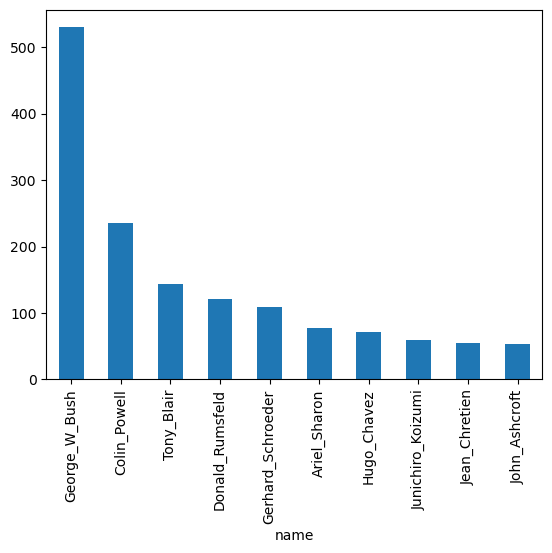

In [19]:
image_paths['name'].value_counts()[:10].plot(kind = "bar")

In [20]:
'''We can see that there are some very well-represented figures among the top 10: generally political and generally male. 
This has important implications for the usefulness of this dataset in generalizations, which we consider in the conclusion.
To draw this further into distinction, how many individuals are represented by a single image, 
compared to George W Bush's 530?'''

"We can see that there are some very well-represented figures among the top 10: generally political and generally male. \nThis has important implications for the usefulness of this dataset in generalizations, which we consider in the conclusion.\nTo draw this further into distinction, how many individuals are represented by a single image, \ncompared to George W Bush's 530?"

In [21]:
ind_counts = image_paths.groupby('name').count().image_path
print(str(sum(ind_counts[ind_counts==1])) + " individuals, which is " + str(round(100*(sum(ind_counts[ind_counts==1])/sum(ind_counts)))) + "% of the total individuals considered, are only represented by a single image in this dataset.")

4069 individuals, which is 31% of the total individuals considered, are only represented by a single image in this dataset.


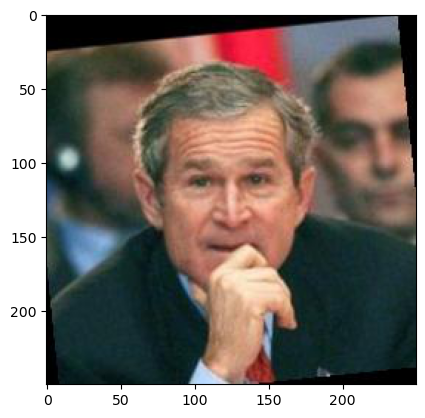

In [22]:
im = Image.open("C:/Users/HP/Downloads/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/" + str(lfw_train.image_path[25]))#when changing index no in image path, o/p is changing
plt.imshow(im)

In [23]:
'''4. Model Construction
4. a. Preliminary Model: Detecting Faces
Any model concerned with classifying faces is posed with a preliminary problem: what is meant by a 'face'? This is obviously 
trivial for humans but identifying a face in an image is non-trivial for an image recognition algorithm. In the LFW data set, 
the data has been pre-processed to ensure that faces occupy a similar portion of each image, and that they are aligned 
consistently, with images rotated so the faces are square with the camera. Furthermore, the main CNN model we encode below 
considers the whole image, so implicitly recognises features of a face without us having to state where the face is. Thus, 
face detection is less important in this situation. However, in the real world - and particularly if we extend CNN analysis to 
videos - images are unlikely to be organised so helpfully, and this processing step is likely to be very important, hence its 
inclusion in this notebook.

To do this, we leverage previous work in the field. Facial detection is a well-researched area, and there are many potential 
methods to investigate and pre-trained models that perform well at identifying the region and features of a face. The model we 
focus on, MTCNN (Multitask Cascaded Convolutional Neural Networks) is optimised to identify the area of an image occupied by a 
face as well as the location of the eyes, nose, and mouth. The mechanics of this are detailed here. At a high level, the model 
leverages three distinct deep convolutional layers to target and model the features of a face, with the layers constructed in a 
way that specifically addresses the challenges associated with facial images such as inconsistent orientation, shadows or 
obstructions, and inconsistent shapes between e.g. an open and closed mouth.

As well as strong performance evaluation on other face datasets, MTCNN has the added benefit of being very fast and very
straightforward to implement, as is demonstrated in the below code cell:'''

"4. Model Construction\n4. a. Preliminary Model: Detecting Faces\nAny model concerned with classifying faces is posed with a preliminary problem: what is meant by a 'face'? This is obviously \ntrivial for humans but identifying a face in an image is non-trivial for an image recognition algorithm. In the LFW data set, \nthe data has been pre-processed to ensure that faces occupy a similar portion of each image, and that they are aligned \nconsistently, with images rotated so the faces are square with the camera. Furthermore, the main CNN model we encode below \nconsiders the whole image, so implicitly recognises features of a face without us having to state where the face is. Thus, \nface detection is less important in this situation. However, in the real world - and particularly if we extend CNN analysis to \nvideos - images are unlikely to be organised so helpfully, and this processing step is likely to be very important, hence its \ninclusion in this notebook.\n\nTo do this, we lever

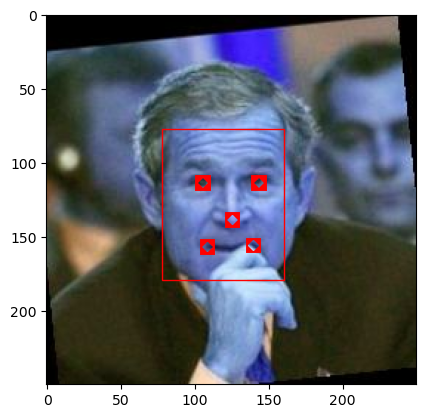

In [24]:
# Use out-of-the-box MTCNN algorithm to identify facial boundaries on a sample image
detector = MTCNN()
image = cv2.imread("C:/Users/HP/Downloads/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/" + str(lfw_train.image_path[25]))
result = detector.detect_faces(image)
# That's it - the results have already been generated! Now we extract the boundaries that have been identified 
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

# Finally, we plot the image along with the face's bounding box and internal features (eyes, nose, and mouth corners)
fig,ax = plt.subplots(1)
ax.imshow(image)
# Create a Rectangle patch
rect = patches.Rectangle(bounding_box[0:2],bounding_box[2],bounding_box[3],linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
# Visualize all the internal features
for key in keypoints:
    rect_key = patches.Rectangle(keypoints[key],1,1,linewidth=10,edgecolor='r',facecolor='none')
    ax.add_patch(rect_key)
# Show the plots
plt.show()

In [25]:
'''4. b. Classifying Faces: CNN Approach on a Simplified Dataset
In this Section we will implement a classic CNN algorithm on the LFW dataset. Before we build any models, it is 
important to understand the structure and purpose of a CNN. There is a wealth of literature available, but the main 
themes are briefly synthesised below.

A Convolutional Neural Network (CNN) is a neural network used primarily for image analysis. Its primary insight is that 
image regions can be scanned to obtain lower-dimensional "convolved" representations that preserve the relationships 
between pixel areas. There are 4 key steps in a CNN:Convolution: convolve the images using a feature detector to obtain a 
feature map (e.g. edge detection)
Non-Linearity: create non-linearities in the data using a non-linear activation function
Pooling: reduce dimension of the feature maps further by considering average convolved values in a region
Connect the layers: organise all previous aspects of the model into a fully connected network that can be used to generate 
model predictions
The network is then trained using back-propagation.

refer to image(cnn)
Illustration of the layers of a CNN (image from "Effects of user-provided photos on hotel review helpfulness: 
An analytical approach with deep leaning" (2018))

Traditional CNN works best when the classes are balanced, and when the classification method is binary, i.e. we are 
testing to see whether the images are in category A or B. We can recreate these conditions on a subset of the data, using the 
most well-sampled individual: George W Bush. The goal of this first-pass CNN is to identify whether an image is George W Bush 
or not; we use a random sample of the other images for category B.'''

'4. b. Classifying Faces: CNN Approach on a Simplified Dataset\nIn this Section we will implement a classic CNN algorithm on the LFW dataset. Before we build any models, it is \nimportant to understand the structure and purpose of a CNN. There is a wealth of literature available, but the main \nthemes are briefly synthesised below.\n\nA Convolutional Neural Network (CNN) is a neural network used primarily for image analysis. Its primary insight is that \nimage regions can be scanned to obtain lower-dimensional "convolved" representations that preserve the relationships \nbetween pixel areas. There are 4 key steps in a CNN:Convolution: convolve the images using a feature detector to obtain a \nfeature map (e.g. edge detection)\nNon-Linearity: create non-linearities in the data using a non-linear activation function\nPooling: reduce dimension of the feature maps further by considering average convolved values in a region\nConnect the layers: organise all previous aspects of the model int

In [26]:
not_george = image_paths[image_paths.name!="George_W_Bush"].sample(530)
not_george.name = "not_George"
GWB_data = pd.concat([image_paths[image_paths.name=="George_W_Bush"],
                     not_george])

In [27]:
# withhold final test data
bush_train, bush_test = train_test_split(GWB_data, test_size=0.2)
#  It is also useful to reserve a validation set in the training data, for use in the model construction
bush_train, bush_val = train_test_split(bush_train,test_size=0.2)

In [28]:
# initialize sequential network
from keras.models import Sequential
# include convolutional layers
from keras.layers import Conv2D
# Pooling layers
from keras.layers import MaxPooling2D
# flatten layers into single vector
from keras.layers import Flatten
from keras.layers import Dense

In [29]:
# use sequential classifier - standard CNN implementation with straightforward single input
Bush_classifier = Sequential()
# We then add layers of complexity to this classifier. The first layer we add is a 2D convolutional layer (as 
# explained above); we pass over the image with a 3x3 window and expect 250*250 pixel input.
# The activation function to introduce non-linearity  is 'relu': Rectified Linear Units, a simple activation function 
# with low computational speeds. One potential downside is that ReLU can lead to "dying neurons", where a neuron is 
# attributed zero influence on classification and gets stuck in this state; we can see output where many neurons have 
# zero influence on the model. If this behaviour manifested in further analysis, an alternate activation function e.g. 
# 'leaky ReLU' would be worth exploring as an alternative
Bush_classifier.add(Conv2D(32, (3, 3), input_shape = (250, 250, 3), activation = 'relu'))

# We now add the pooling layer to reduce the dimension
Bush_classifier.add(MaxPooling2D(pool_size = (2, 2)))

# The next step is to flatten the data, reducing the feature maps to a 1D array
Bush_classifier.add(Flatten())

# We then add a fully connected layer - traditional Multi Layer Perceptron
Bush_classifier.add(Dense(units = 128, activation = 'relu'))

# as we are just training on 'Bush' vs 'non-Bush', we only need to add one classification unit
Bush_classifier.add(Dense(units = 1, activation = 'sigmoid'))

# We are now ready to compile the model. It is possible, and advisable, to introduce more layers to the network, but
# as this model is exploratory we are keeping things straightforward for now (this would change in future iterations)
Bush_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
'''The model is now ready to run, but there is a final step required: the model will read training files from a dedicated 
training folder, so we need to make sure all the images are in folders with the correct labels.'''

'The model is now ready to run, but there is a final step required: the model will read training files from a dedicated \ntraining folder, so we need to make sure all the images are in folders with the correct labels.'

In [31]:
# define a custom function to move images to a new train/test/val directory

def directory_mover(data,dir_name):
    co = 0
    for image in data.image_path:
        # create top directory
        if not os.path.exists(os.path.join('/kaggle/working/',dir_name)):
            shutil.os.mkdir(os.path.join('/kaggle/working/',dir_name))
        
        data_type = data[data['image_path'] == image]['name']
        data_type = str(list(data_type)[0])
        if not os.path.exists(os.path.join('/kaggle/working/',dir_name,data_type)):
            shutil.os.mkdir(os.path.join('/kaggle/working/',dir_name,data_type))
        path_from = os.path.join('../input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/',image)
        path_to = os.path.join('/kaggle/working/',dir_name,data_type)
        # print(path_to)
        shutil.copy(path_from, path_to)
        # print('Moved {} to {}'.format(image,path_to))
        co += 1
        
    print('Moved {} images to {} folder.'.format(co,dir_name))

In [32]:
# move images:
directory_mover(bush_train,"Bush_train/")
directory_mover(bush_val,"Bush_val/")
directory_mover(bush_test,"Bush_test/")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/working/Bush_train/'

In [ ]:
#Now all the images are in the relevant training/test folders, we can run our CNN algorithm.
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
Bush_training_set = train_datagen.flow_from_directory('/kaggle/working/Bush_train/',
                                                 target_size = (250, 250),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
Bush_val_set = test_datagen.flow_from_directory('/kaggle/working/Bush_val/',
                                            target_size = (250, 250),
                                            batch_size = 32,
                                            class_mode = 'binary')
Bush_test_set = test_datagen.flow_from_directory('/kaggle/working/Bush_test/',
                                            target_size = (250, 250),
                                                 batch_size = 32,
                                                                                             class_mode = 'binary')

In [ ]:
Bush_history = Bush_classifier.fit_generator(Bush_training_set,
                                             # set steps per epoch equal to the number of training images
                                             steps_per_epoch = 678,
                                             # there is a six hour runtime limit on Kaggle Kernels, restricting the maximum epoch number
                                             epochs = 8,
                                             validation_data = Bush_val_set,
                                             validation_steps = 100)

In [ ]:
plt.plot(Bush_history.history['accuracy'])
plt.plot(Bush_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(Bush_history.history['loss'])
plt.plot(Bush_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
'''Given the relatively low number of epochs, the model still appears to be converging - the validation loss/accuracy 
is instable, which is also a function of the validation method (in future iterations, cross validation would be a preferable 
method). However, accuracy is generally high on both sets, indicating that the model is performing well. To confirm the model's 
performance, we look at the precision and recall on the (unseen) test set, comparing accuracy with the true labels:'''
from keras.preprocessing import image

# create a function to predict class of images in a directory, given a trained classifier
def predictions(dir_name,classifier,binary):
    # dir_name should include name of predicted invididual - could edit this to iterate through folders in future
    predictions = []
    for im in os.listdir(dir_name):
        test_image = image.load_img(dir_name + str(im), target_size = (250,250))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        if(binary is True):
            result = float(str(classifier.predict(test_image))[2])
        else: 
            result = np.argmax(classifier.predict(test_image))
            predictions.append(result)
    return(predictions)

In [ ]:
# classes are passed through the algorithm in a random order - we want to retrieve the order of the classes
Bush_test_names = []
# collect all file names
for i in range(len(Bush_test_set.filenames)):
    Bush_test_names.append(Bush_test_set.filenames[i])
# extract unique names, in order
for i in range(len(Bush_test_names)):
    Bush_test_names[i] = Bush_test_names[i].split("/")[0]
Bush_test_name_order = list(OrderedDict.fromkeys(Bush_test_names))

In [ ]:
# Compute predictions
Bush_predictions_0 = predictions("/kaggle/working/Bush_test/"+ Bush_test_name_order[0] + "/",Bush_classifier,binary = True)
Bush_predictions_1 = predictions("/kaggle/working/Bush_test/"+ Bush_test_name_order[1] + "/",Bush_classifier, binary = True)

# Compare predictions to actual classes
Bush_predictions_frame = pd.DataFrame(list(zip(Bush_predictions_0 + Bush_predictions_1,
                                                [0] * len(Bush_predictions_0) + [1] * len(Bush_predictions_1))),
                                       columns = ['Predictions','Actual'])